In [2]:
import pandas as pd
import numpy as np
# import pandas_datareader as pdr
# import FinanceDataReader as fdr
# from pykrx import stock

import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')


In [4]:
def 잔존만기(오늘날짜,만기일,workday=252):
  만기일 = pd.to_datetime(만기일).date()
  오늘날짜 = pd.to_datetime(오늘날짜).date()
  잔존만기일 = (np.busday_count(오늘날짜, 만기일)+1)/workday #begin_dates, end_dates
  print(잔존만기일)
  return 잔존만기일

In [5]:
#블랙 숄즈 머튼 모형을 사용한 유러피안 콜옵션 가격결정
from scipy import stats

def 옵션이론가(기초자산, 행사가,잔존만기일, 이자율= 0.02, 변동율=0.1):
  d1 = (np.log(기초자산/행사가)+(이자율+변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  d2 = (np.log(기초자산/행사가)+(이자율-변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  # print(d1,d2)
  옵션이론가 = 기초자산*stats.norm.cdf(d1, 0, 1)- 행사가*np.exp(-이자율*잔존만기일)*stats.norm.cdf(d2, 0,1)
  
  return 옵션이론가



In [ ]:
잔존만기일 = 잔존만기('2018-07-01','2019-03-21')
행사가 = 330
현물가 = 300
옵션이론가(현물가, 행사가, 잔존만기일)

0.75
-0.8840408083846625 -0.9706433487631064


2.581246837789422

## 현물가별 옵션가격 변화 분석

In [ ]:
# 잔존만기일 = 잔존만기('2018-07-01','2019-03-21')
잔존만기일 = 0.3849
행사가 = 330
S = np.arange(200,400,10) #현물가(시장가격)
K = np.arange(150,350,10) #행사가격

kdic = {}
for k in K:
  sdic={}
  for s in S:
    option_price = 옵션이론가(s,k, 잔존만기일,이자율=0.02, 변동율=0.4)
    sdic[s]= option_price
  kdic[k] = pd.Series(sdic)

df = pd.DataFrame(kdic)
df.head()



,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340
200,53.588113,45.407660,37.944527,31.279125,25.449060,20.450248,16.243476,12.763850,9.930795,7.657020,5.855598,4.444918,3.351678,2.512293,1.873134,1.390007,1.027195,0.756301,0.555061,0.406231
210,62.797165,54.160104,46.124171,38.789242,32.222040,26.451979,21.472760,17.248056,13.719345,10.814176,8.453647,6.558439,5.053175,3.869199,2.946041,2.231861,1.683208,1.264341,0.946332,0.706083
220,72.252571,63.264367,54.766304,46.866253,39.649720,33.172228,27.456700,22.495272,18.254220,14.680511,11.708690,9.267166,7.283375,5.687618,4.415628,3.410016,2.620866,2.005696,1.529008,1.161601
230,81.882285,72.629989,63.768091,55.403516,47.631046,40.524016,34.128748,28.462988,23.517785,19.261768,15.646664,12.613081,10.095827,8.028347,6.346116,4.988971,3.902533,3.038884,2.356676,1.820866
240,91.633182,82.185980,73.043551,64.305736,56.068820,48.416062,41.410483,35.090812,29.470643,24.540297,20.270531,16.617225,13.526271,10.938101,8.791525,7.026718,5.587348,4.421942,3.484602,2.735233


           150        160        170  ...       320       330       340
200  53.588113  45.407660  37.944527  ...  0.756301  0.555061  0.406231
210  62.797165  54.160104  46.124171  ...  1.264341  0.946332  0.706083
220  72.252571  63.264367  54.766304  ...  2.005696  1.529008  1.161601
230  81.882285  72.629989  63.768091  ...  3.038884  2.356676  1.820866
240  91.633182  82.185980  73.043551  ...  4.421942  3.484602  2.735233

[5 rows x 20 columns]


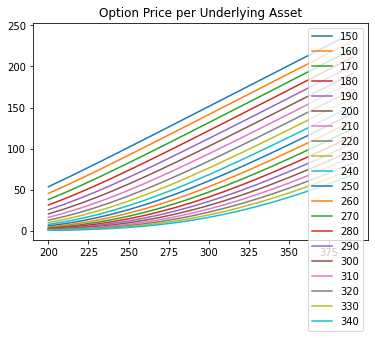

In [ ]:
# myplot(df.loc[[111,151,211],:])
myplot(df, title='Option Price per Underlying Asset') #현물가격별 옵션이론가 변화

* 행사가격이 낮을수록 콜옵션 가격이 올라간다. 
* 시장가격이 높을수록 콜옵션 가격은 높아진다. 





## Greeks

### delta, gamma, theta, vega

In [6]:
def delta(기초자산, 행사가, 잔존만기일, 이자율=0.02, 변동율=0.1):
  d1 = (np.log(기초자산/행사가)+(이자율+변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  delta = stats.norm.cdf(d1,0,1)

  return delta

def gamma(기초자산, 행사가, 잔존만기일, 이자율=0.02, 변동율=0.1):
  d1 = (np.log(기초자산/행사가)+(이자율+변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  gamma = (1/(변동율*기초자산*np.sqrt(2*np.pi*잔존만기일)))*np.exp(-(d1**2)*0.5)
  return gamma


In [7]:
def theta(기초자산, 행사가, 잔존만기일, 이자율=0.02, 변동율=0.1):
  d1 = (np.log(기초자산/행사가)+(이자율+변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  d2 = (np.log(기초자산/행사가)+(이자율-변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  theta = -행사가*이자율*np.exp(-이자율*잔존만기일)*stats.norm.cdf(d2,0,1)- 변동율*기초자산/(2*np.sqrt(2*np.pi*잔존만기일))*np.exp(-(d1**2)*0.5)
  return theta

In [8]:
def vega(기초자산, 행사가, 잔존만기일, 이자율=0.02, 변동율=0.1):
  d1 = (np.log(기초자산/행사가)+(이자율+변동율**2 *0.5)*잔존만기일)/ (변동율*np.sqrt(잔존만기일))
  vega = 기초자산*np.sqrt(잔존만기일/(2*np.pi))*np.exp(-(d1**2)*0.5)

  return vega


### 기초자산별(Underlying Asset) 변화

In [ ]:
잔존만기일 = 0.384920634920635
행사가 = 330
S = np.arange(280,380,1) #현물가(시장가격)
opt_delta = delta(S, 330, 잔존만기일)
opt_gamma = gamma(S, 330, 잔존만기일)
opt_theta = theta(S, 330, 잔존만기일)
opt_vega = vega(S, 330, 잔존만기일)

opt_df = pd.DataFrame({'Delta':opt_delta, 'Gamma':opt_gamma,'Theta':opt_theta,'Vega':opt_vega,'S':S})
opt_df = opt_df.set_index("S")

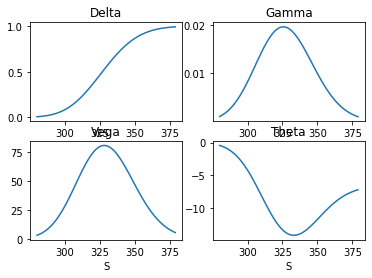

In [ ]:
plt.figure()

plt.subplot(221)
opt_df['Delta'].plot()
plt.title('Delta')
plt.subplot(222)
opt_df['Gamma'].plot()
plt.title('Gamma')
plt.subplot(223)
opt_df['Vega'].plot()
plt.title('Vega')
plt.subplot(224)
opt_df['Theta'].plot()
plt.title('Theta')
plt.show()

시간별 theta변화

In [ ]:
잔존만기일 = np.arange(1,0,-0.1)
행사가 = 330
S = 331
opt_vega = vega(S,행사가, 잔존만기일)

opt_df = pd.DataFrame({'Theta':opt_theta,'time':잔존만기일})
opt_df = opt_df.set_index("time")

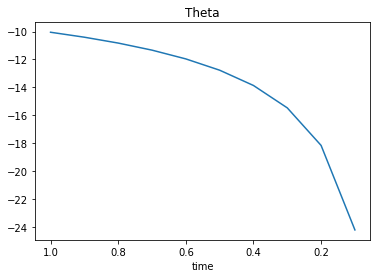

In [ ]:
opt_df['Theta'].plot().invert_xaxis()
plt.title('Theta')
plt.show()



변동율별 vega변화

In [ ]:
잔존만기일 = 0.3849
행사가 = 330
S = 331
volatility = np.arange(0,1,0.1)
opt_vega = vega(S,행사가, 330, 잔존만기일, 변동율= volatility)

opt_df = pd.DataFrame({'Vega':opt_vega,'변동율':volatility})
opt_df = opt_df.set_index("변동율")

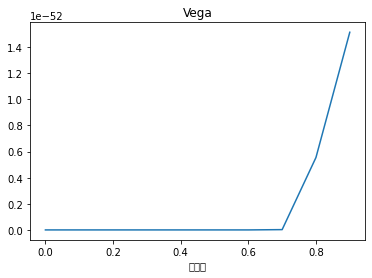

In [ ]:
opt_df['Vega'].plot()
plt.title('Vega')
plt.show()



### 행사가격별(Strike price) 변화

In [ ]:
잔존만기일 = 0.384920634920635
행사가 = np.arange(150,350,10) #행사가격
기초자산 = 250
opt_delta = delta(기초자산, 행사가, 잔존만기일)
opt_gamma = gamma(기초자산, 행사가, 잔존만기일)
opt_theta = theta(기초자산, 행사가, 잔존만기일)
opt_vega = vega(기초자산, 행사가, 잔존만기일)

opt_df = pd.DataFrame({'Delta':opt_delta, 'Gamma':opt_gamma,'Theta':opt_theta,'Vega':opt_vega,'행사가':행사가})
opt_df = opt_df.set_index("행사가")

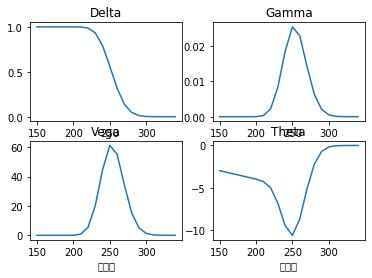

In [ ]:
plt.figure()

plt.subplot(221)
opt_df['Delta'].plot()
plt.title('Delta')
plt.subplot(222)
opt_df['Gamma'].plot()
plt.title('Gamma')
plt.subplot(223)
opt_df['Vega'].plot()
plt.title('Vega')
plt.subplot(224)
opt_df['Theta'].plot()
plt.title('Theta')
plt.show()

### 행사가, 기초자산 모두 변화

In [ ]:
잔존만기일 = 0.3849
S = np.arange(200,400,10) #현물가(시장가격)
K = np.arange(150,350,10) #행사가격
kdic = {}
for k in K:
  sdic={}
  for s in S:
    option_price = 옵션이론가(s,k, 잔존만기일,이자율=0.02, 변동율=0.4)
    sdic[s]= option_price
  kdic[k] = pd.Series(sdic)

df = pd.DataFrame(kdic)
df.head()



,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340
200,53.588113,45.407660,37.944527,31.279125,25.449060,20.450248,16.243476,12.763850,9.930795,7.657020,5.855598,4.444918,3.351678,2.512293,1.873134,1.390007,1.027195,0.756301,0.555061,0.406231
210,62.797165,54.160104,46.124171,38.789242,32.222040,26.451979,21.472760,17.248056,13.719345,10.814176,8.453647,6.558439,5.053175,3.869199,2.946041,2.231861,1.683208,1.264341,0.946332,0.706083
220,72.252571,63.264367,54.766304,46.866253,39.649720,33.172228,27.456700,22.495272,18.254220,14.680511,11.708690,9.267166,7.283375,5.687618,4.415628,3.410016,2.620866,2.005696,1.529008,1.161601
230,81.882285,72.629989,63.768091,55.403516,47.631046,40.524016,34.128748,28.462988,23.517785,19.261768,15.646664,12.613081,10.095827,8.028347,6.346116,4.988971,3.902533,3.038884,2.356676,1.820866
240,91.633182,82.185980,73.043551,64.305736,56.068820,48.416062,41.410483,35.090812,29.470643,24.540297,20.270531,16.617225,13.526271,10.938101,8.791525,7.026718,5.587348,4.421942,3.484602,2.735233


In [ ]:
df.shape

(20, 20)

Text(0.5, 0.92, 'Option Price')

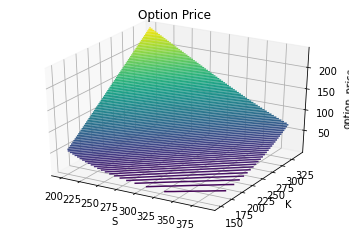

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(S,K, df.to_numpy(), 100)
ax.set_xlabel('S')
ax.set_ylabel('K')
ax.set_zlabel('option_price')
plt.title('Option Price')


In [ ]:
잔존만기일 = 0.384920634920635
S = np.arange(200,400,10) #현물가(시장가격)
K = np.arange(150,350,10) #행사가격

delta_list = []
gamma_list = []
theta_list = []
vega_list = []
for k in K:    
    opt_delta = delta(S, k, 잔존만기일)
    opt_gamma = gamma(S, k, 잔존만기일)
    opt_theta = theta(S, k, 잔존만기일)
    opt_vega = vega(S, k, 잔존만기일)

    delta_list.append(opt_delta)
    gamma_list.append(opt_gamma)
    theta_list.append(opt_theta)
    vega_list.append(opt_vega)

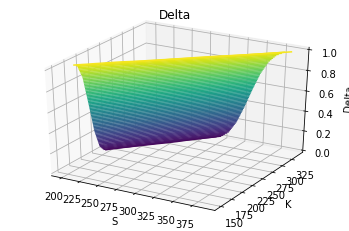

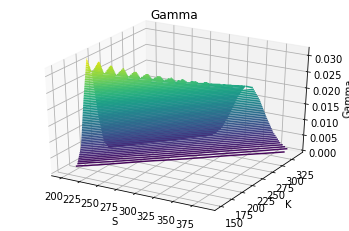

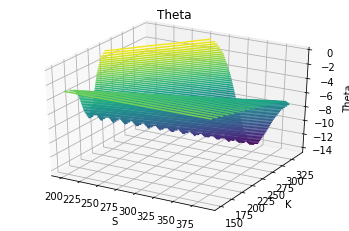

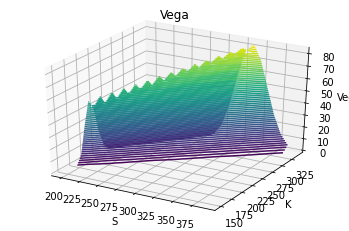

In [ ]:
Greeks = {'Delta':delta_list, 'Gamma':gamma_list,'Theta':theta_list, 'Vega':vega_list}

for name, greek in Greeks.items():
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.contour3D(S,K, greek, 70)
  ax.set_xlabel('S')
  ax.set_ylabel('K')
  ax.set_zlabel(name)
  plt.title(name)


## 블랙숄즈를 활용한 STOXX50  옵션의 내재변동성 분석
* STOXX 50:유로존 주식의  주가 지수
* ref = 'https://gist.github.com/yhilpisch/5c3c7cac0b55ebe5aef9a15e639afeb8'

### class: call_option

In [75]:
# Valuation of European Call Options in BSM Model
# and Numerical Derivation of Implied Volatility
# 03_stf/BSM_imp_vol.py

# (c) Dr. Yves J. Hilpisch
# from Hilpisch, Yves (2014): Python for Finance, O'Reilly.

from scipy import stats
from scipy.optimize import fsolve

class call_option(object):
  """Calss for European call option in Black-Scholes Model

  인수
  ====
  S0: float
      기초자산/ 지수
  K:  float
      행사가(strike price)
  t : datetime/ Timestamp object
      구매일
  M : datetime/ Timestamp object
      만기일
  r : float
      이자율
  sigma : float:
      변동율(volatility factor in diffusion term)
  
  함수
  ====
  value: float
      콜옵션의 현재가치 
  vega: float
      콜옵션의 베가
  imp_vol: float
      옵션이론가 기준 내재 변동성
 """ 
  def __init__(self, S0, K, t, M, r, sigma):
    self.S0 = float(S0)
    self.K = K
    self.t = t
    self.M = M
    self.r = r
    self.sigma =sigma

  def update_ttm(self):
    """Updates time-to-maturity self.T"""
    if self.t > self.M:
      raise ValueError("Pricing date later than maturity")
    self.T =  (self.M- self.t).days/252.
  
  def d1(self):
    """Helper function """
    d1 = ((np.log(self.S0 / self.K) +
           (self.r + 0.5 * self.sigma **2) * self.T) / (self.sigma * np.sqrt(self.T)))
    
    return d1
  
  def value(self):
    """Return option value """
    self.update_ttm()
    d1 = self.d1()
    d2 = ((np.log(self.S0/ self.K)+ 
           (self.r -0.5* self.sigma**2)*self.T) / (self.sigma *np.sqrt(self.T)))
    
    value = (self.S0 * stats.norm.cdf(d1,0.0,1.0)- self.K *np.exp(-self.r*self.T)* stats.norm.cdf(d2,0.0,1.0))
    return value

  def vega(self):
    """Return Vega of option"""
    self.update_ttm()
    d1 = self.d1
    vega =self.S0* stats.norm.cdf(d1,0.0,1.0) * np.sqrt(self.T)
    return vega
  
  def imp_vol(self, C0, sigma_est =0.2):
    """Return implied volatility given option price"""

    option = call_option(self.S0, self.K, self.t, self.M,self.r, sigma_est)
    option.update_ttm()

    def difference(sigma):
      option.sigma = sigma
      return option.value() - C0
    iv = fsolve(difference, sigma_est)[0]
    return iv

In [98]:
row =1
r = -0.05
test = call_option(S0,data['Strike'][row],data['Date'][row],data['Maturity'][row],r, 0.2)
test.update_ttm()

def difference(sigma):
  test.sigma = sigma
  return test.value() - data['Call'][row]
fsolve(difference, 0.2)

array([0.62589649])

### 데이터 적용

In [101]:
# EURO STOXX50 index data
es_url =  'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
cols = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
        'SXXF', 'SXXA', 'DK5F', 'DKXF', 'DEL']
es = pd.read_csv(es_url, header=None, index_col = 0,
                 parse_dates = True, dayfirst = True,
                 skiprows=4,
                 sep=';',
                 names=cols)
del es['DEL']
S0 = es['SX5E']['30-09-2014']
r = -0.05 #이자율

#Option Data
data = pd.read_csv("http://hilpisch.com/es50_option_data.csv", index_col =0, parse_dates=['Date','Maturity'])


In [ ]:
for row in range(data.shape[0]):
  data.loc[row,'잔존만기일'] = 잔존만기('2014-09-30',data.loc[row,'Maturity'])

### 내재 변동성 구하기
 - 내재변동성: 주어진 옵션가격을 만족하게 하는 변동성 파라미터 값
    - fsolve함수로 최적해 구함

 -  moneyness: 옵션 행사가를 기초자산(or 선물가격)으로 미분한 값, 옵션의 내재가치를 의미함.
- black-scholes에서의 moneyness 함수
-<img src= https://wikimedia.org/api/rest_v1/media/math/render/svg/9459e12c18636da92e819f03fbe0c3cff175a1a6>



In [105]:
data['내재변동성'] =0.0
tol = 0.30  # tolerance for moneyness 선물가격 기준 30% 이내의 행사가를 가진 옵션만 선택
for row in data.index:
  forward = np.exp(r *data.loc[row,'잔존만기일'])*S0
  if (abs(data['Strike'][row]- forward)/forward) < tol:
        call = call_option(S0,data['Strike'][row],data['Date'][row],data['Maturity'][row],r, 0.2)
        data['내재변동성'][row] =  call.imp_vol(data['Call'][row]) #C0


내재변동성 plot

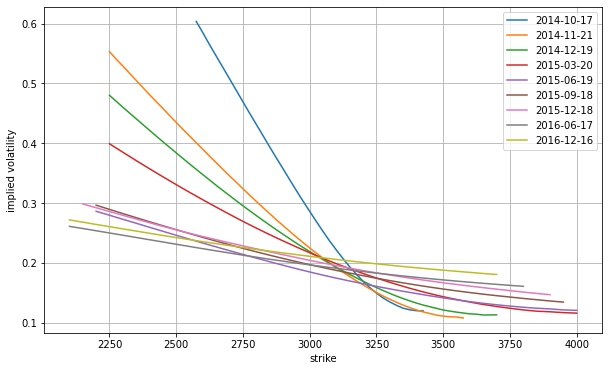

In [106]:
maturities = sorted(set(data['Maturity']))
plt.figure(figsize = (10,6))
for i, mat in enumerate(maturities):
  dat = data[(data['Maturity']==mat)& (data['내재변동성']>0)]
  plt.plot(dat['Strike'].values, dat['내재변동성'].values, label = str(mat)[:10])
  plt.grid(True)
  plt.legend()
  plt.xlabel('strike')
  plt.ylabel('implied volatility')
plt.show()


만기일이 가까울수록 행사가에 따른 내재변동성 변화가 크다 

In [116]:
analysis_data= data[data['내재변동성']>0]
analysis_data.groupby(['Maturity','Strike'])['Call','내재변동성'].mean()

Call     내재변동성
Maturity   Strike                 
2014-10-17 2575.0  658.2  0.603478
           2600.0  633.3  0.584424
           2625.0  608.3  0.564511
           2650.0  583.4  0.545481
           2675.0  558.5  0.526438
...                  ...       ...
2016-12-16 3500.0  167.9  0.187779
           3550.0  153.6  0.185896
           3600.0  140.2  0.184043
           3650.0  127.7  0.182234
           3700.0  116.3  0.180602

[367 rows x 2 columns]